# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')
sns.set()
np.random.seed(42)

In [36]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [37]:
# return the empirical cumulative distribution function ECDF for a given 1-dimensional array
def ecdf(data):
    x = np.sort(data)
    n = len(data)
    y = np.arange(1,n+1)/n
    return x, y

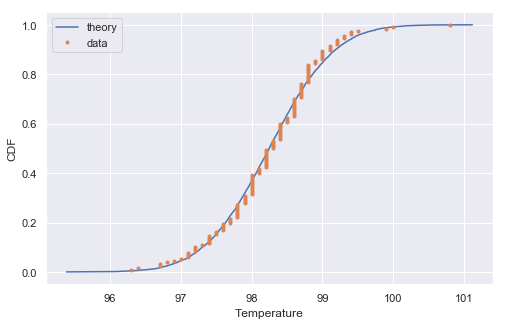

observed mean =  98.24923076923078
observed std =  0.7303577789050377
number of observations =  130
max observation =  100.8
min observation =  96.3
z score max obs =  3.4924927267747696
z score min obs =  -2.6688711006174173


In [38]:
#plot ecdf of temperature data
#plot theoretical cdf based on mean and std of temperature data
temp_data = df['temperature']
x, y = ecdf(temp_data)
mean_obs = np.mean(temp_data)
std_obs = np.std(temp_data)
num_obs = len(temp_data)
max_obs = max(temp_data)
min_obs = min(temp_data)
z_max = (max_obs - mean_obs)/std_obs
z_min = (min_obs - mean_obs)/std_obs
#obtain 10000 observations from normal distribution
samples = np.random.normal(mean_obs, std_obs, size=10000)
x_th, y_th = ecdf(samples)

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
txt = plt.xlabel('Temperature')
txt = plt.ylabel('CDF')
lst = ax.plot(x_th, y_th, label='theory')
lst = ax.plot(x, y, marker='.',linestyle='none', label='data')
legend = ax.legend()
plt.show()

print('observed mean = ', mean_obs)
print('observed std = ', std_obs)
print('number of observations = ', num_obs)
print('max observation = ', max_obs)
print('min observation = ', min_obs)
print('z score max obs = ', z_max)
print('z score min obs = ', z_min)

<div class="span5 alert alert-success">
<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
</ol>

_The temperature looks to be normally distributed. The plot above shows the observed cumulative distribution function (CDF) plot as orange points and the theoretical CDF for a normal distrution as a solid blue line. The blue theoretical curve is visualized using the mean and standard deviation from the sample. The data visually fits well with the theoritical curve._

_Regarding normality tests, the max observation is 3.5 standard deviations above the mean. For a sample of 130 observations, this may indicate that the true distribution has a wider tail._
</div>

In [39]:
def bootstrap_replicate_1d(data, func, size):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, size)
    return func(bs_sample)

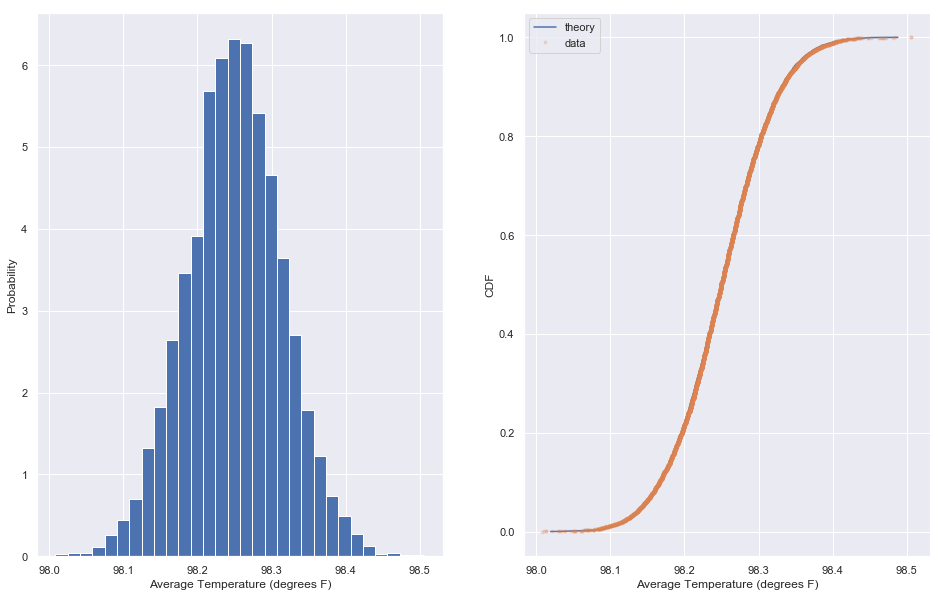

observed mean =  98.24923076923078
observed std =  0.7303577789050377
number of observations =  130
95% confidence interval =  [98.12153846 98.37692308]
mean of mean temperature =  98.24980038461538
std of mean temperature =  0.06466876439680495
std_obs / std_meanTemp =  11.293826095448361
sqrt number of observations =  11.40175425099138
t value at 98.6 =  5.415282302840981
p value at 98.6 =  0.0
z value at 98.6 =  5.475925202078116
p value at 98.6 =  0.0
% change t and z score =  1.119847421533692


In [40]:
# Take replicates of data set and calculate mean for each replicate
# Calculate distribution of average temperature from set of replicates
# Determine how likely the observed average temp is, based on the distribution obtained

# take 10,000 replicates
num_of_reps = 10000
bs_replicates = np.empty(num_of_reps)
for i in range(num_of_reps):
    bs_replicates[i] = bootstrap_replicate_1d(temp_data, np.mean, num_obs)

# calculate 95% confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
# calculate mean of mean temperature
mean_meanTemp = np.mean(bs_replicates)    
# calculate std of mean temperature
std_meanTemp = np.std(bs_replicates)    

#plot histogram of average temp
fig = plt.figure(figsize=(16,10))
ax = plt.subplot(1,2,1)
txt = plt.xlabel('Average Temperature (degrees F)')
txt = plt.ylabel('Probability')
_ = plt.hist(bs_replicates, bins=30, density=True)

#plot cdf of mean temp distribution
x, y = ecdf(bs_replicates)
samples = np.random.normal(mean_obs, std_obs/np.sqrt(num_obs), size=10000)
x_th, y_th = ecdf(samples)
ax = plt.subplot(1,2,2)
txt = plt.xlabel('Average Temperature (degrees F)')
txt = plt.ylabel('CDF')
lst = ax.plot(x_th, y_th, label='theory')
lst = ax.plot(x, y, marker='.',linestyle='none', label='data', alpha=0.2)
legend = ax.legend()

plt.show()

print('observed mean = ', mean_obs)
print('observed std = ', std_obs)
print('number of observations = ', num_obs)
print('95% confidence interval = ', conf_int)
print('mean of mean temperature = ', mean_meanTemp)
print('std of mean temperature = ', std_meanTemp)

# calculate ratio std_obs / std_meanTemp
print('std_obs / std_meanTemp = ', std_obs/std_meanTemp)

# square root of number of observations
print('sqrt number of observations = ', np.sqrt(num_obs))

# calculate t statistic for an observation of 98.6 degrees (reported by Carl Wunderlich, 1868)
temp_cw = 98.6
t_cw = (temp_cw - mean_meanTemp)/std_meanTemp
print('t value at 98.6 = ', t_cw)

# calculate its p value
p_cw_t = np.sum(bs_replicates >= temp_cw)/len(bs_replicates)
print('p value at 98.6 = ', p_cw_t)

# calculate z statistic for an observation of 98.6 degrees
z_cw = (temp_cw - mean_obs)/(std_obs/np.sqrt(num_obs))
print('z value at 98.6 = ', z_cw)

# calculate its p value
p_cw_z =  np.sum(samples >= temp_cw)/len(samples)
print('p value at 98.6 = ', p_cw_z)

#percent change between p and z score
print('% change t and z score = ', np.abs(t_cw - z_cw)*100/t_cw)

<div class="span5 alert alert-success">
In the cell above, we create replicates of the data and calculate the mean for each replicate. This is done 10,000 times to obtain the histogram of replicates above. Note that the mean of this distribution and the sample mean have close agreement (98.2498 vs 98.2492, respectively). The ratio of the observed standard deviation to the distribution of replicates standard deviation is 11.29. As per the central limit theorem, this ratio is the square root of the number of observations, in this case 11.40. So there is close agreement between the calculated and theoretical value. The plot above to the right is the CDF from the replicate data (orange dots) and the CDF of a normal distribution (blue curve). The average and standard deviation from replicate distrution was used to graph the blue curve. Both curves are in close agreement.

<ol>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>

_We can conclude that the replicate distribution is well epproximated by a normal distrubtion. Since we obtained a normal distribution for the replicates, we can ascertain that the individual observations are independent events since this is a requirement of the central limit theorem. Also, we can say that the sample is large enough. If the sample were too small, then the replicate distribution would look different from a normal distribution._

<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

_Using the boostrap replicates, we obtain a distribution where 98.6 degrees is well outside the 95% confidence internal. The t score for 98.6 using this distribution is 5.42 standard deviations. Assuming a normal distribution with sample mean and standard deviation equal to the sample standard deviation divided by square root of the sample size, the z score is 5.48. Both t and z statistic give a p value that is less than 1 part in ten thousand._

_In this case, the t and z score are in close agreement. Therefore only z score is necessary._

_For the z score, a one-sample test was used as we are not comparing two populations._

_Given the small p value, we can conclude that 98.6 is not the true mean._

</ol>
</div>

In [41]:
def diff_from_cw(data, temp_cw=98.6):
    return np.mean(data) - temp_cw

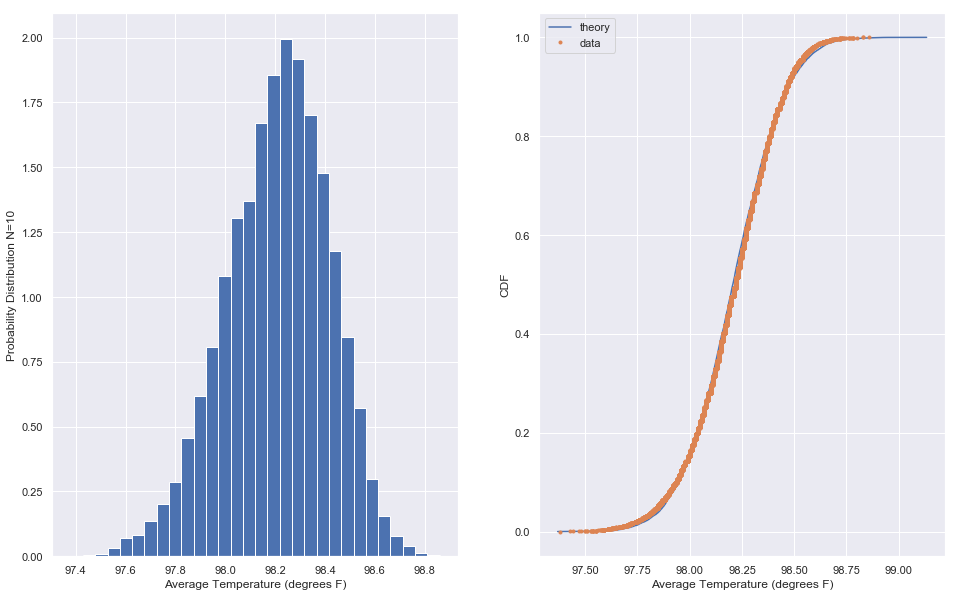

observed mean =  98.21000000000001
observed std =  0.6503076195155646
number of observations =  10
95% confidence interval =  [97.77 98.58]
mean of mean temperature =  98.206814
std of mean temperature =  0.2068075661188438
std_obs / std_meanTemp =  3.1445059371853907
sqrt number of observations =  3.1622776601683795
t value at 98.6 =  1.901216707777762
p value at 98.6 =  0.019
z value at 98.6 =  1.8964690716438808
p value at 98.6 =  0.0294
% change t and z score =  0.24971567493904787


In [42]:
# Randomly sample 10 observations from the original data; repeat analysis above using this subset.
temp_data_10 = np.random.choice(temp_data, 10)
mean_obs_10 = np.mean(temp_data_10)
std_obs_10 = np.std(temp_data_10)

# take 10,000 replicates
num_of_reps = 10000
sample_size = 10
bs_replicates_10 = np.empty(num_of_reps)
for i in range(num_of_reps):
    bs_replicates_10[i] = bootstrap_replicate_1d(temp_data_10, np.mean, sample_size)

# calculate 95% confidence interval
conf_int_n10 = np.percentile(bs_replicates_10, [2.5, 97.5])
# calculate mean of mean temperature
mean_meanTemp_n10 = np.mean(bs_replicates_10)    
# calculate std of mean temperature
std_meanTemp_n10 = np.std(bs_replicates_10)    

#plot histogram of average temp
fig = plt.figure(figsize=(16,10))
ax = plt.subplot(1,2,1)
txt = plt.xlabel('Average Temperature (degrees F)')
txt = plt.ylabel('Probability Distribution N=10')
_ = plt.hist(bs_replicates_10, bins=30, density=True)

#plot cdf of mean temp distribution
x, y = ecdf(bs_replicates_10)
samples = np.random.normal(mean_obs_10, std_obs_10/np.sqrt(sample_size), size=10000)
x_th, y_th = ecdf(samples)
ax = plt.subplot(1,2,2)
txt = plt.xlabel('Average Temperature (degrees F)')
txt = plt.ylabel('CDF')
lst = ax.plot(x_th, y_th, label='theory')
lst = ax.plot(x, y, marker='.',linestyle='none', label='data')
legend = ax.legend()

plt.show()

print('observed mean = ', mean_obs_10)
print('observed std = ', std_obs_10)
print('number of observations = ', sample_size)
print('95% confidence interval = ', conf_int_n10)
print('mean of mean temperature = ', mean_meanTemp_n10)
print('std of mean temperature = ', std_meanTemp_n10)

# calculate ratio std_obs / std_meanTemp
print('std_obs / std_meanTemp = ', std_obs_10/std_meanTemp_n10)

# square root of number of observations
print('sqrt number of observations = ', np.sqrt(sample_size))


# calculate t statistic for an observation of 98.6 degrees (reported by Carl Wunderlich, 1868)
temp_cw = 98.6
t_cw_n10 = (temp_cw - mean_meanTemp_n10)/std_meanTemp_n10
print('t value at 98.6 = ', t_cw_n10)

# calculate its p value
p_cw_t_n10 = np.sum(bs_replicates_10 >= temp_cw)/len(bs_replicates_10)
print('p value at 98.6 = ', p_cw_t_n10)

# calculate z statistic for an observation of 98.6 degrees
z_cw_n10 = (temp_cw - mean_obs_10)/(std_obs_10/np.sqrt(sample_size))
print('z value at 98.6 = ', z_cw_n10)

# calculate its p value
p_cw_z_n10 =  np.sum(samples >= temp_cw)/len(samples)
print('p value at 98.6 = ', p_cw_z_n10)

#percent change between p and z score
print('% change t and z score = ', np.abs(t_cw_n10 - z_cw_n10)*100/t_cw_n10)

<div class="span5 alert alert-success">
<ol>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
</ol>

_Using samples of size 10, we see that 98.6 temperature falls just outside the 95% confidence interval.The t and z score are around 1.9 standard deviations above the mean. The p value for t and z statistic is around 2% and 3%, respectively. Therefore, a temperature 98.6 or higher is observed in 2% to 3% percent of observations._

_Applying t or z statistic gives the same results even though the sample size is small. I expect that this agreement is due to the fact that the underlying population distribution (that is the distribution from which we have a sample of 130 temperature readings) is a normal distribution. A more significant difference would be observed between t and z scores had this underlying distribution been much different from a normal distribution._
</div>

In [48]:
#Calculate the 2.5 and 97.5 percentiles for each replicate taken from the 130-sized sample.
num_of_reps = 10000
bs_replicates_2_5 = np.empty(num_of_reps)
bs_replicates_97_5 = np.empty(num_of_reps)
for i in range(num_of_reps):
    bs_sample = np.random.choice(temp_data, num_obs)
    bs_replicates_2_5[i] = np.percentile(bs_sample, [2.5])
    bs_replicates_97_5[i] = np.percentile(bs_sample, [97.5])

mean_2_5 = np.mean(bs_replicates_2_5)
std_2_5 = np.std(bs_replicates_2_5)

mean_97_5 = np.mean(bs_replicates_97_5)
std_97_5 = np.std(bs_replicates_97_5)

print('bootstrap approach:')
print('average 2.5 percentile = ', mean_2_5)
print('error 2.5 percentile = ', std_2_5)
print('average 97.5 percentile = ', mean_97_5)
print('error 97.5 percentile = ', std_97_5)
print('\n')
#frequentist approach; assume distribution normal with average mean_obs and standard deviation std_obs
print('frequentist approach:')
frequentist_2_5 = stats.norm.ppf(0.025, mean_obs, std_obs)
frequentist_97_5 = stats.norm.ppf(0.975, mean_obs, std_obs)
print('2.5 percentile = ', frequentist_2_5)
print('97.5 percentile = ', frequentist_97_5)

bootstrap approach:
average 2.5 percentile =  96.771726
error 2.5 percentile =  0.18561273440688253
average 97.5 percentile =  99.57651350000002
error 97.5 percentile =  0.28080659592991813
99.85732009592994 99.2957069040701


frequentist approach:
2.5 percentile =  96.81775582674824
97.5 percentile =  99.68070571171332


<div class="span5 alert alert-success">
<ol>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
</ol>
    
_Using boostrap approach, an average 2.5 percentile is computed along with its standard deviation (or error). The same is repeated with 97.5 percentile. The 2.5 percentile is 96.77 +/- 0.19 and 97.5 percentile is 99.58 +/- 0.28._

_From a frequentist approach, the 2.5 and 97.5 percentiles are 96.82 and 99.68, respectively._

_Temperature is considered abnormal if above 99.6 or below 96.8._
</div>

In [44]:
def bootstrap_perms(concatenate_data, func, size_group_A):
    """Generate permutations. Calculate statistic of each group. Return difference"""
    perm = np.random.permutation(concatenate_data)
    group_A = perm[:size_group_A]
    group_B = perm[size_group_A:]
    return func(group_A) - func(group_B)

In [45]:
#create arrays for female and male observations
female_data  = df.loc[df['gender'].str.contains('F', regex=False), 'temperature']
male_data    = df.loc[df['gender'].str.contains('M', regex=False), 'temperature']

female_count = len(female_data)
male_count   = len(male_data)

female_mean  = np.mean(female_data)
male_mean    = np.mean(male_data)

print('number of females = ', female_count)
print('number of males = '  , male_count)
print('mean temp females = ', female_mean)
print('mean temp males = '  , male_mean)

obs_diff = female_mean - male_mean
print('observed difference = ', obs_diff)

concatenate_data = np.concatenate((female_data.values, male_data.values))

# take 10000 permutations of data
num_of_perms = 10000
bs_perms = np.empty(num_of_perms)
for i in range(num_of_perms):
    bs_perms[i] = bootstrap_perms(concatenate_data, np.mean, female_count)

    
# calculate 95% confidence interval
conf_int = np.percentile(bs_perms, [2.5, 97.5])
# calculate mean of mean temperature
mean_diff = np.mean(bs_perms)    
# calculate std of mean temperature
std_diff = np.std(bs_perms)       
    
print('95% confidence interval = '   , conf_int)
print('mean diff = '                 , mean_diff)
print('standard deviation of diff = ', std_diff)
    
p_value = np.sum(bs_perms >= obs_diff)/len(bs_perms)
print('p value = ', p_value)

number of females =  65
number of males =  65
mean temp females =  98.39384615384613
mean temp males =  98.1046153846154
observed difference =  0.289230769230727
95% confidence interval =  [-0.25230769  0.24923077]
mean diff =  0.00019076923076906383
standard deviation of diff =  0.12908354089572194
p value =  0.0102


<div class="span5 alert alert-success">
<ol>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

_Assuming the same distribution between females and males, permutations were taken and the temperature was computed for the female and male group. The observed difference in temperature between females and males was 0.2892. A distribution of temperature differences was obtained with mean around 0 and standard deviation of 0.129. The observed difference is outside the 95% confidence interval, with p value at 0.0141. Although the observation is outside the confidence internal, the p value is not too extremely low. Therefore it is not obvious whether the temp difference observed is significant or random noise. As per the p value, the probability of this observation is 1.4 percent._
</div>